# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Andhika Pratama Putra
- **Email:** andhikap2323@gmail.com
- **ID Dicoding:** andhk12

## Menentukan Pertanyaan Bisnis

- Apa trend dari peminjaman sepeda?
- Kapan jam operasional yang paling menguntungkan untuk meningkatkan pendapatan?
- Bagaimana pengaruh cuaca terhadap jumlah peminjaman?


## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("D:\Study\Dicoding\latihan1\Bike-sharing-dataset\day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv("D:\Study\Dicoding\latihan1\Bike-sharing-dataset\hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

### Assessing Data

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
day_df.duplicated().sum()

0

In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
hour_df.duplicated().sum()

0

In [11]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Tidak terdapat missing value dan dupikasi data, namun terdapat kesalahan tipe data dteday yang seharunsya datetime bukan objec(string)

# Cleaning Data


In [12]:
for df in [hour_df, day_df]:
    df["dteday"] = pd.to_datetime(df["dteday"])

In [13]:
list_columns = ["season", "yr", "mnth", "holiday", "weekday", "workingday", "weathersit"]

for i in list_columns:
    day_df[i] = day_df[i].astype("category")

day_df['mnth'] = day_df['mnth'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
day_df['season'] = day_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
day_df['weekday'] = day_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
day_df['weathersit'] = day_df['weathersit'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

day_df['yr'] = day_df['yr'].map({
    0: '2011', 1: '2012'
})

day_df['workingday'] = day_df['workingday'].map({
    0: 'Holiday', 1: 'Workingday'
})

day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,Jan,0,Sat,Holiday,Misty,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,Jan,0,Sun,Holiday,Misty,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,Jan,0,Mon,Workingday,Clear/Partly Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,Jan,0,Tue,Workingday,Clear/Partly Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,Jan,0,Wed,Workingday,Clear/Partly Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [14]:
list_columns = ["season", "yr", "mnth", "holiday", "weekday", "workingday", "weathersit"]

for i in list_columns:
    hour_df[i] = hour_df[i].astype("category")

hour_df['mnth'] = hour_df['mnth'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
hour_df['season'] = hour_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
hour_df['weekday'] = hour_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
hour_df['weathersit'] = hour_df['weathersit'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

hour_df['yr'] = hour_df['yr'].map({
    0: '2011', 1: '2012'
})

hour_df['workingday'] = hour_df['workingday'].map({
    0: 'Holiday', 1: 'Workingday'
})

hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,Jan,0,0,Sat,Holiday,Clear/Partly Cloudy,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,Jan,1,0,Sat,Holiday,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,Jan,2,0,Sat,Holiday,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,Jan,3,0,Sat,Holiday,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,Jan,4,0,Sat,Holiday,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,0,1,1


Insight:
- Hasil dari coding diatas adalah mengganti tipe data dteday menjadi datetime dan tipe data season, yr, mnth, holiday, weekday, workingday, weathersit menjadi category untuk mencegah interpretasi data.

## Exploratory Data Analysis (EDA)

In [15]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731,731,731,731.0,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,2,12,2.0,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,2012,Jan,0.0,Sun,Workingday,Clear/Partly Cloudy,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,366,62,710.0,105,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [16]:
day_df.groupby(by="yr", observed=True).agg({
    "casual": "mean",
    "registered": "mean",
    "cnt": "mean"
})

,casual,registered,cnt
yr,,,
2011,677.402740,2728.358904,3405.761644
2012,1018.483607,4581.450820,5599.934426


In [17]:
day_df.groupby(by="season", observed=True).agg({
    "cnt": ["max", "min", "mean", "std"]
})

cnt                                
         max   min         mean          std
season                                      
Spring  7836   431  2604.132597  1399.942119
Summer  8362   795  4992.331522  1695.977235
Fall    8714  1115  5644.303191  1459.800381
Winter  8555    22  4728.162921  1699.615261

In [18]:
day_df.groupby(by="workingday", observed=True).agg({
    "cnt": ["max", "min", "mean", "std"]
})

cnt                               
             max  min         mean          std
workingday                                     
Holiday     8714  605  4330.168831  2052.141245
Workingday  8362   22  4584.820000  1878.415583

In [19]:
day_df.groupby(by="weekday", observed=True).agg({
    "cnt": ["max", "min", "mean", "std"]
})

cnt                                
          max   min         mean          std
weekday                                      
Sun      8227   605  4228.828571  1872.496629
Mon      7525    22  4338.123810  1793.074013
Tue      7767   683  4510.663462  1826.911642
Wed      8173   441  4548.538462  2038.095884
Thu      7804   431  4667.259615  1939.433317
Fri      8362  1167  4690.288462  1874.624870
Sat      8714   627  4550.542857  2196.693009

In [20]:
hour_df.groupby(by="weathersit", observed=True).agg({
    "cnt": ["max", "min", "mean", "std"]
})

cnt                            
                     max min        mean         std
weathersit                                          
Clear/Partly Cloudy  977   1  204.869272  189.487773
Misty                957   1  175.165493  165.431589
Light Snow/Rain      891   1  111.579281  133.781045
Severe Weather       164  23   74.333333   77.925178

In [21]:
hour_df.groupby(by="hr", observed=True).agg({
    "cnt": ["max", "min", "mean", "std"]
})

cnt                            
    max min        mean         std
hr                                 
0   283   2   53.898072   42.307910
1   168   1   33.375691   33.538727
2   132   1   22.869930   26.578642
3    79   1   11.727403   13.239190
4    28   1    6.352941    4.143818
5    66   1   19.889819   13.200765
6   213   1   76.044138   55.084348
7   596   1  212.064649  161.441936
8   839   5  359.011004  235.189285
9   426  14  219.309491   93.703458
10  539   8  173.668501  102.205413
11  663  10  208.143054  127.495536
12  776   3  253.315934  145.081134
13  760  11  253.661180  148.107657
14  750  12  240.949246  147.271574
15  750   7  251.233196  144.632541
16  783  11  311.983562  148.682618
17  976  15  461.452055  232.656611
18  977  23  425.510989  224.639304
19  743  11  311.523352  161.050359
20  567  11  226.030220  119.670164
21  584   6  172.314560   89.788893
22  502   9  131.335165   69.937782
23  256   2   87.831044   50.846889

**Insight:**
- Sebagian besar peminjaman terjadi pada registered users dibanding dengan casual users
- Peminjaman cenderung lebih tinggi pada workingday (indikasi sepeda digunakan untuk transportasi kerja)
- Weathersit berkorelasi dengan jumlah peminjaman. Cuaca yang buruk memungkinkan penurunan jumlah peminjaman sepeda
- Pola peminjaman per jam menunjukkan tren tertentu, kemungkinan ada jam sibuk dan jam lengang.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apa trend dari peminjaman sepeda?

C:\Users\User\AppData\Local\Temp\ipykernel_17604\2054553868.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  year_pattern = day_df.groupby(['mnth', 'yr'])[['cnt']].sum().reset_index()


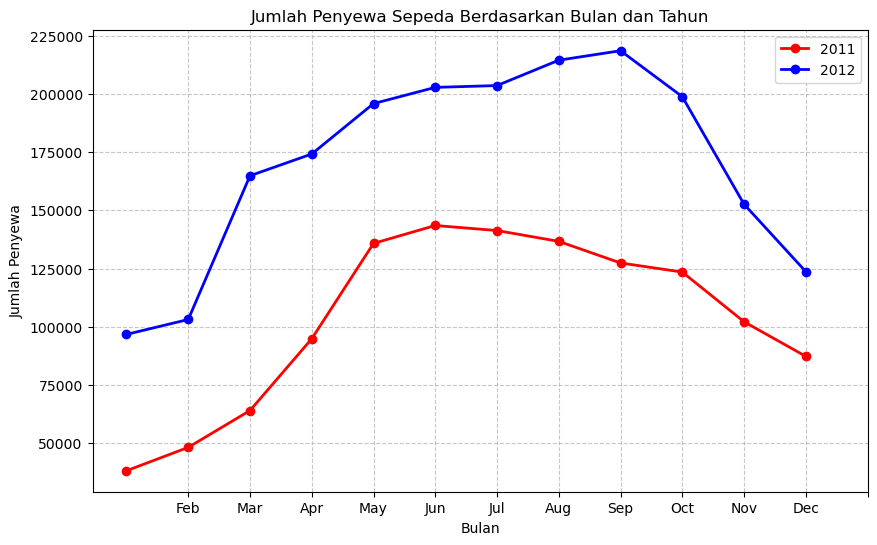

In [22]:
year_pattern = day_df.groupby(['mnth', 'yr'])[['cnt']].sum().reset_index()

plt.figure(figsize=(10, 6))

plt.plot(
    year_pattern[year_pattern['yr'] == "2011"]['mnth'], 
    year_pattern[year_pattern['yr'] == "2011"]['cnt'],
    label='2011',
    color='red',  
    marker='o', 
    linewidth=2
)

plt.plot(
    year_pattern[year_pattern['yr'] == "2012"]['mnth'],  
    year_pattern[year_pattern['yr'] == "2012"]['cnt'],
    label='2012',
    color='blue', 
    marker='o', 
    linewidth=2
)

plt.xlabel("Bulan")
plt.ylabel("Jumlah Penyewa")
plt.title("Jumlah Penyewa Sepeda Berdasarkan Bulan dan Tahun")
plt.xticks(range(1, 13))  
plt.legend()  
plt.grid(True, linestyle="--", alpha=0.7) 

plt.show()

### Pertanyaan 2: Kapan jam operasional yang paling menguntungkan untuk meningkatkan pendapatan?

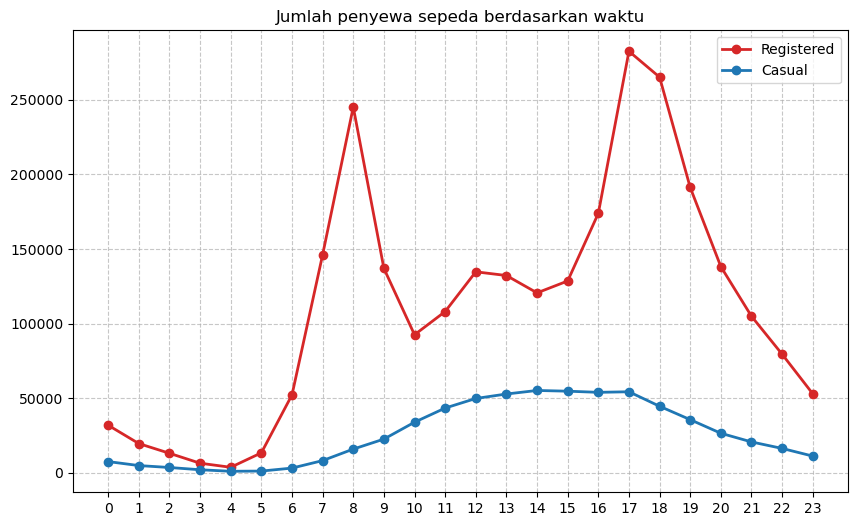

In [23]:
hour_pattern = hour_df.groupby('hr')[['registered', 'casual']].sum().reset_index()
plt.figure(figsize=(10, 6))

plt.plot(
    hour_pattern['hr'],
    hour_pattern['registered'],
    label='Registered',
    color='tab:red',
    marker='o', 
    linewidth=2
)

plt.plot(
    hour_pattern['hr'],
    hour_pattern['casual'],
    label='Casual',
    color='tab:blue',
    marker='o', 
    linewidth=2
)

plt.xlabel(None)
plt.ylabel(None)
plt.title('Jumlah penyewa sepeda berdasarkan waktu')
plt.xticks(range(0, 24))  
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7) 
plt.show()

### Pertanyaan 3: Bagaimana pengaruh cuaca terhadap jumlah peminjaman?

C:\Users\User\AppData\Local\Temp\ipykernel_17604\1177568761.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_pattern = day_df.groupby('weathersit')[['cnt']].sum().reset_index()
D:\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


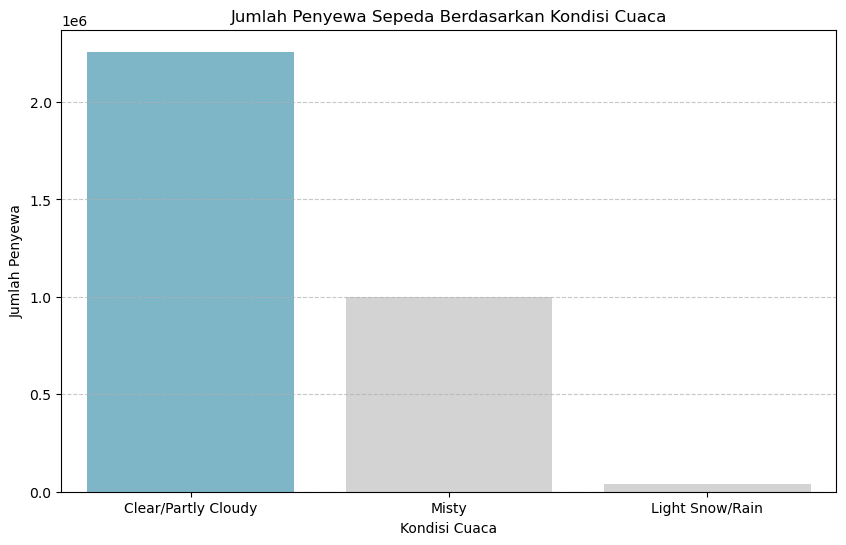

In [24]:
season_pattern = day_df.groupby('weathersit')[['cnt']].sum().reset_index()

colors = ["#D3D3D3"] * len(season_pattern) 
max_index = season_pattern['cnt'].idxmax()
colors[max_index] = "#72BCD4"  

plt.figure(figsize=(10, 6))
sns.barplot(
    x="weathersit", 
    y="cnt", 
    data=season_pattern, 
    palette=colors 
)

plt.xlabel("Kondisi Cuaca")
plt.ylabel("Jumlah Penyewa")
plt.title("Jumlah Penyewa Sepeda Berdasarkan Kondisi Cuaca")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

## RFM Analysis

- Recency: Hari terakhir peminjaman sepeda (dengan asumsi pelanggan adalah individu yang sering menyewa).
- Frequency: Jumlah hari pelanggan menyewa sepeda.
- Monetary: Total jumlah sepeda yang disewa oleh pelanggan.

In [25]:
latest_date = day_df["dteday"].max()

rfm_df = day_df.groupby("dteday").agg({
    "cnt": "sum" 
}).reset_index()

rfm_summary = pd.DataFrame()
rfm_summary["dteday"] = rfm_df["dteday"]
rfm_summary["Recency"] = (latest_date - rfm_summary["dteday"]).dt.days  
rfm_summary["Frequency"] = rfm_df["dteday"].value_counts().values  
rfm_summary["Monetary"] = rfm_df["cnt"]  

rfm_summary.head()

,dteday,Recency,Frequency,Monetary
0,2011-01-01,730,1,985
1,2011-01-02,729,1,801
2,2011-01-03,728,1,1349
3,2011-01-04,727,1,1562
4,2011-01-05,726,1,1600


D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


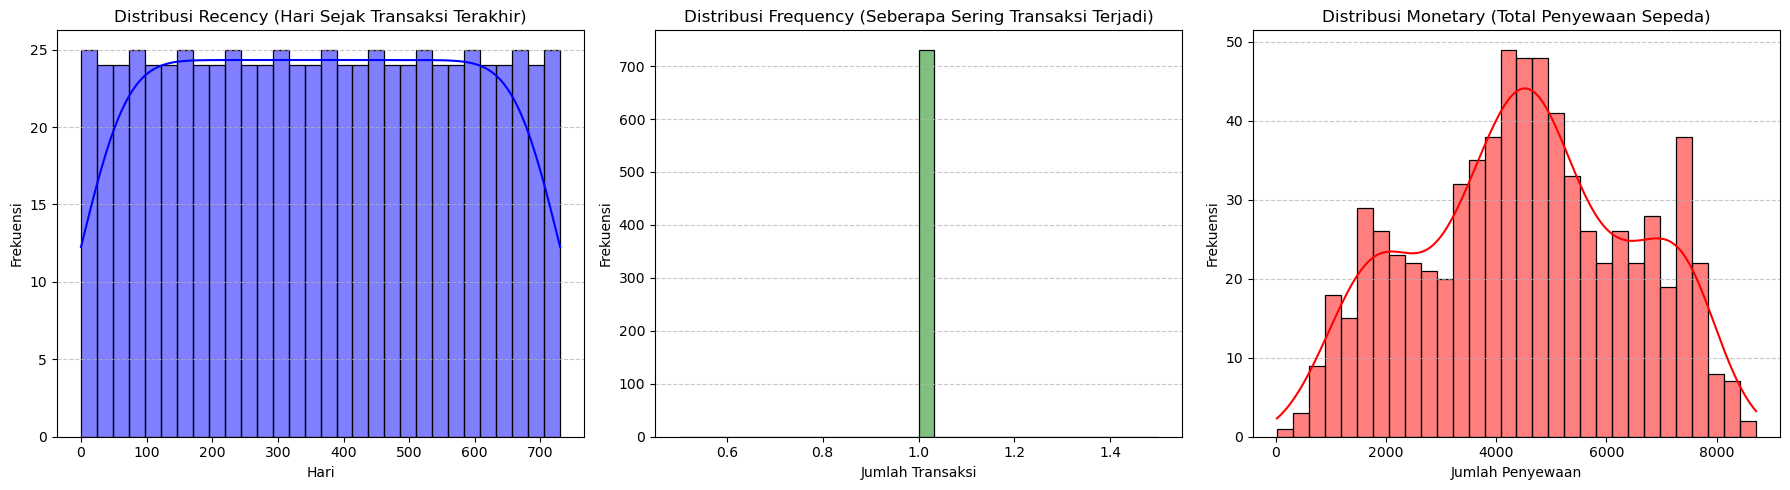

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(rfm_summary["Recency"], bins=30, kde=True, color="blue", ax=axes[0])
axes[0].set_title("Distribusi Recency (Hari Sejak Transaksi Terakhir)")
axes[0].set_xlabel("Hari")
axes[0].set_ylabel("Frekuensi")
axes[0].grid(axis="y", linestyle="--", alpha=0.7)

sns.histplot(rfm_summary["Frequency"], bins=30, kde=True, color="green", ax=axes[1])
axes[1].set_title("Distribusi Frequency (Seberapa Sering Transaksi Terjadi)")
axes[1].set_xlabel("Jumlah Transaksi")
axes[1].set_ylabel("Frekuensi")
axes[1].grid(axis="y", linestyle="--", alpha=0.7)

sns.histplot(rfm_summary["Monetary"], bins=30, kde=True, color="red", ax=axes[2])
axes[2].set_title("Distribusi Monetary (Total Penyewaan Sepeda)")
axes[2].set_xlabel("Jumlah Penyewaan")
axes[2].set_ylabel("Frekuensi")
axes[2].grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()


## Conclusion

- Conclution pertanyaan 1 : Trend penyewaan sepeda naik pada tahun 2012 dari tahun sebelumnya. Kenaikan terjadi pad a Maret hingga September, lalu mengalami penurunan saat akhir tahun
- Conclution pertanyaan 2 : Penyewaan sepeda paling menguntungkan pada pagi dan sore hari.
- Conclution pertanyaan 3 : Dapat diketahui penyewaan sepeda paling digemari saat hari cerah dengan penyewaan terbanyak.